## Imports

run below cell to import necessary libraries. You are only allowed to use these libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 2)



## Dataset (10 points)

This dataset comes from a proof-of-concept study published in 1999 by Golub et al. It showed how new cases of cancer could be classified by gene expression monitoring (via DNA microarray) and thereby provided a general approach for identifying new cancer classes and assigning tumors to known classes. These data were used to classify patients with acute myeloid leukemia (AML) and acute lymphoblastic leukemia (ALL).

In [ ]:
#####################################################################################
#                          COMPLETE THE FOLLOWING SECTION                           #
#####################################################################################
# load all data using pandas. 
# DataSet.csv as train dataset.
# labels.csv as data labels.
# And Drop columns including call name as these columns as it doesn't have any 
# statistical relevance
##################################################################################### 
Train_Data = pd.read_csv("DataSet.csv")
Train_Data.drop(['Gene Description','Gene Accession Number'], axis=1,inplace=True)
labels =pd.read_csv("labels.csv")
labels.drop(['patient'], axis=1,inplace=True)
####################################################################################
#                                   THE END                                        #
####################################################################################  
Train_Data.head()


,1,2,3,4,5,6,7,8,9,10,...,57,58,60,61,65,66,63,64,62,72
0,-214,-139,-76,-135,-106,-138,-72,-413,5,-88,...,-137,-157,-172,-47,-62,-58,-161,-48,-176,-131
1,-153,-73,-49,-114,-125,-85,-144,-260,-127,-105,...,-51,-370,-122,-442,-198,-217,-215,-531,-284,-126
2,-58,-1,-307,265,-76,215,238,7,106,42,...,-82,-77,38,-21,-5,63,-46,-124,-81,-50
3,88,283,309,12,168,71,55,-2,268,219,...,178,340,31,396,141,95,146,431,9,211
4,-295,-264,-376,-419,-230,-272,-399,-541,-210,-178,...,-135,-438,-201,-351,-256,-191,-172,-496,-294,-206


Here we go to pre process the data for pca analysis. do these steps one by one

In [ ]:





#
#####################################################################################
# Drop Gene Description and Gene Accession Number to have a numeric matrix.
# the result should be stored in train variable.
#####################################################################################
train = Train_Data
####################################################################################
#                                   THE END                                        #
####################################################################################  
train.index = pd.to_numeric(train.index)
train.sort_index(inplace=True)
train


,1,2,3,4,5,6,7,8,9,10,...,57,58,60,61,65,66,63,64,62,72
0,-214,-139,-76,-135,-106,-138,-72,-413,5,-88,...,-137,-157,-172,-47,-62,-58,-161,-48,-176,-131
1,-153,-73,-49,-114,-125,-85,-144,-260,-127,-105,...,-51,-370,-122,-442,-198,-217,-215,-531,-284,-126
2,-58,-1,-307,265,-76,215,238,7,106,42,...,-82,-77,38,-21,-5,63,-46,-124,-81,-50
3,88,283,309,12,168,71,55,-2,268,219,...,178,340,31,396,141,95,146,431,9,211
4,-295,-264,-376,-419,-230,-272,-399,-541,-210,-178,...,-135,-438,-201,-351,-256,-191,-172,-496,-294,-206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7124,793,782,1138,627,250,645,1140,1799,758,570,...,507,1372,87,1111,707,423,809,466,551,874
7125,329,295,777,170,314,341,482,446,385,359,...,64,642,98,459,354,41,445,349,194,393
7126,36,11,41,-50,14,26,10,59,115,9,...,-11,-9,-26,-8,-22,0,-2,0,20,34
7127,191,76,228,126,56,193,369,781,244,171,...,198,608,153,73,260,1777,210,284,379,237


## Variable Selection

To reduce the computation costs, instead of working on all 20184 genes present in the dataset, we will focus on 1000 genes that have the most variance.

In [ ]:
# TODO: limited_data should contain columns of data corresponding to genes with most variance
import statistics
variances,limited_data_list=[],[]
for i in range(len(train)):
    variances.append([statistics.variance(train.loc[i,:]),i])
    
sorted_variances=sorted(variances)[::-1]# bigest to smallest
for i in range(1000):
    loc=sorted_variances[i][1]
    limited_data_list.append(train.loc[loc,:].tolist())

limited_data=pd.DataFrame(limited_data_list,columns=[i for i in range(72)])
limited_data=limited_data.T
limited_data

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,17602,17962,15091,21011,-272,31086,8656,20764,-113,19748,...,443,695,509,-796,788,1624,536,730,1917,1183
1,9868,16964,11038,25240,-194,29288,13285,17636,4452,7657,...,389,812,286,-970,1691,238,1258,131,1603,1434
2,28056,23436,16692,14950,-79,14835,15704,23324,775,1032,...,443,810,610,-2111,1029,1081,2098,91,3200,2022
3,23812,22240,15763,31449,-300,25421,15691,21733,157,13356,...,509,599,294,-1555,695,1223,254,49,1416,2615
4,3553,5472,18128,12606,-157,29543,3390,20332,2175,13769,...,35,282,375,-331,1627,761,127,0,1749,924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,53204,33833,39323,3946,58,24407,29136,37795,410,3670,...,375,226,458,-373,1219,588,49,71,389,778
68,32,77,15689,25367,-398,31585,-52,20306,17505,21350,...,416,2063,531,-167,3280,1518,312,107,1484,1590
69,382,780,41570,71369,252,17789,252,49267,-154,10640,...,-13,1580,105,-284,1726,2334,284,70,2605,2453
70,7531,11055,39538,48374,-97,29775,5347,41778,17626,27467,...,257,1962,634,593,1663,1663,53,37,1427,1223


## PCA (30 points)


Implement PCA. Then use it to project the data to the latent space. Finally, reconstruct the data and report the reconstruction error for both training and test datasets. Note that you should implement the PCA, so using existing libraries is not allowed. you should use numpy to compute eigenvectors/eigenvalues of a matrix.

# ignore the below cell

In [ ]:
#DEAR TA IGNORE THIS PART
from numpy import array
from sklearn.decomposition import PCA
# define a matrix
# create the PCA instance
pca = PCA(70)
pca.fit(limited_data)
# access values and vectors
print(pca.components_,pca.components_.shape)
#print(pca.explained_variance_)
# transform data
B = pca.transform(limited_data)
print(pca.components_.shape)

[[ 0.36037737  0.24087809  0.31803963 ...  0.00381401 -0.00813929
  -0.00241479]
 [-0.09259818 -0.03869224  0.04017531 ... -0.00271548  0.00757091
   0.00094336]
 [-0.14807134 -0.15034758  0.0554499  ... -0.00837059  0.00463161
   0.00349193]
 ...
 [ 0.02119924 -0.0220441  -0.05047649 ...  0.01660953 -0.00692774
  -0.01114603]
 [-0.04653456 -0.08386658  0.06831639 ...  0.00882071  0.04262554
  -0.00429659]
 [ 0.0054705   0.0012896   0.02136791 ...  0.00131276  0.0069677
  -0.03784855]] (70, 1000)
(70, 1000)


In [ ]:
def loss_function(a, b):
  #####################################################################################
  #                          COMPLETE THE FOLLOWING SECTION                           #
  #####################################################################################
  # Implement a function that given the original data and a
  # reconstructed version, returns the reconstruction's mean squared error.
  #####################################################################################
    result =np.mean((a-b)**2)
  ####################################################################################
  #                                   THE END                                        #
  #################################################################################### 
    return result

# implementing PCA  using SVD

In [ ]:
def PCA2(X, n_components):
    X = X - np.mean(X, axis=0)
    [u,s,v] = np.linalg.svd(X)
    v = v.T
    v = v[:,:n_components]
    p=np.dot(X, v)
    return v.T,p # v.t=pc_components , p=trasformed data

PCA2(limited_data,72)[0].shape#pc_components.shape 

(72, 1000)

# implementing PCA without using SVD

In [ ]:
def PCA(X, n_components=72):
    #####################################################################################
    #                          COMPLETE THE FOLLOWING SECTION                           #
    #####################################################################################
    # X: a vector of shape (N, M)
    # n_components: size of latent space (< M)
    # returns a vector of shape (n_components, M) containing the first `n_components` PCs.
    #####################################################################################
    X = X - np.mean(X, axis=0)
  
    cov_matrix = np.cov(X.T)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    eigenvectors = eigenvectors.T
    index = np.argsort(eigenvalues)[::-1]
    eigenvectors=eigenvectors[index]
    vector= eigenvectors[0:n_components]

    #vector=np.dot(X,vector.T)
    ####################################################################################
    #                                   THE END                                        #
    #################################################################################### 
    return vector
PCA(limited_data).shape

(72, 1000)

In [ ]:
pca = PCA(limited_data)
pca.shape,PCA2(limited_data,72)[0].shape
#pca = PCA(train, n_components=72)

((72, 1000), (72, 1000))

In [ ]:
def reconstruct_PCA(X):
    #####################################################################################
    #                          COMPLETE THE FOLLOWING SECTION                           #
    #####################################################################################
    # Compute PCs for the X.
    # Project X to the space of computed PCs.
    # Reconstruct X from projected data.
    #####################################################################################
    mu=np.mean(X,axis=0)#computing mu to adding it back to our X dataframe 
    mu_df=[]
    for i in mu:
        mu_df.append([i] *72)
    mu_df=np.array(mu_df).T
    
  
    principal_components = PCA(X,72)
    X = X - np.mean(X, axis=0)
    projected_data = np.dot(X,principal_components.T)

    reconstructed_data = np.dot(projected_data,principal_components)+mu_df
    ####################################################################################
    #                                   THE END                                        #
    ####################################################################################     
    return reconstructed_data
pca_rec = reconstruct_PCA(limited_data)
loss_function(pca_rec,limited_data.values.tolist())


(1.047636696017379e-21+0j)

In [ ]:
def reconstruct_PCA(X):
#####################################################################################
    mu=np.mean(X,axis=0)
    mu_df=[]
    for i in mu:
        mu_df.append([i] *72)
    mu_df=np.array(mu_df).T
    
    principal_components = PCA2(X,72)[0]#using svd for pca
    X = X - np.mean(X, axis=0)
    projected_data = PCA2(X,72)[1]
    
    reconstructed_data = np.dot(projected_data,principal_components)+ mu_df
    ####################################################################################
    #                                   THE END                                        #
    ####################################################################################     
    return reconstructed_data
pca_rec = reconstruct_PCA(limited_data)
loss_function(pca_rec,limited_data.values.tolist())


2.1816804201079634e-21

In [ ]:
#pca_rec = reconstruct_PCA(limited_data)
pca_rec = reconstruct_PCA(limited_data)
pca_rec.shape

(72, 1000)

In [ ]:
## Run This cell to find how your functions working!
loss_function(pca_rec , limited_data.values.tolist())



2.1816804201079634e-21

## K-Means (20 points)



read the below cell codes. this is using sklearn pca implementation. we use this function to use in our kmeans clustering.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
x_norm = StandardScaler().fit_transform(limited_data)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_norm)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])
principalDf = principalDf.set_index(labels.index)
finalDf = pd.concat([principalDf, labels['cancer']], axis = 1)
finalDf


,PC1,PC2,cancer
0,4.341202,-4.770872,ALL
1,14.195648,1.693619,ALL
2,14.183927,-1.751284,ALL
3,1.756293,-3.357064,ALL
4,11.519685,-9.365319,ALL
...,...,...,...
67,-9.111561,-8.859139,ALL
68,9.836478,22.720641,ALL
69,-1.017386,19.754236,ALL
70,-4.869208,17.797065,ALL


here we try to initialize centroids. Note that we already knows we have two cluster, So from our prior knowledge we define number of clusters equal to two.

In [ ]:
np.random.seed(1000)
# Number of clusters
k = 2
X = np.array(list(zip(finalDf['PC1'], finalDf['PC2'])))
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)
C_x,C[:,0]

[[23.  0.]
 [ 7. 30.]]


(array([23,  7]), array([23.,  7.], dtype=float32))

Now you can see the unlabeled data and our initialization data by running following cell

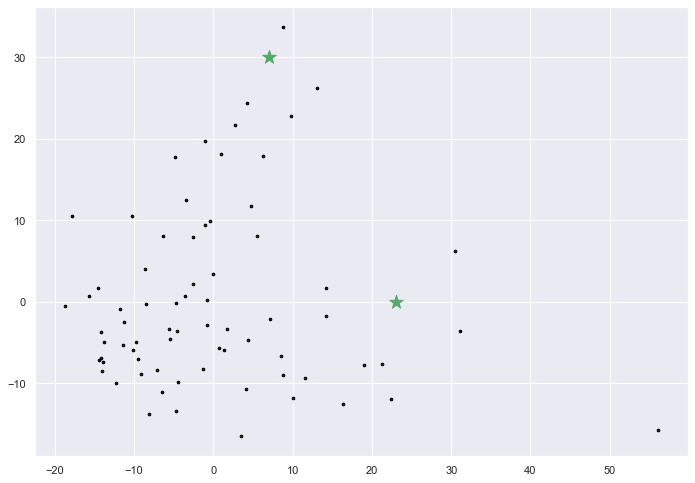

In [ ]:
# Plotting along with the Centroids
plt.scatter(finalDf['PC1'], finalDf['PC2'], c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

It's your turn. Implement K-Means function which return a np.array with size equal to your data. this array contain each point label that you assigned using kmeans clustering.

In [ ]:
def Kmeans(X, Centroids):
    clusters = np.zeros(len(X))
    # To store the value of centroids when it updates
    C = Centroids
    C_old = np.zeros(C.shape)
    # Cluster Lables(0, 1)
    clusters = np.zeros(len(X))
    # Error func. - Distance between new centroids and old centroids
    error = np.linalg.norm(C - C_old)
    ####################################################################################
    #                          COMPLETE THE FOLLOWING SECTION                          #
    ####################################################################################
    # Implement K-Means Clustering
    # Assigning each value to its closest cluster
    # Storing the old centroid values
    # Finding the new centroids by taking the average value
    # clusters variable should contain (0,1) labels. 0 for first cluster and 1 for the second. 
    ####################################################################################
    # Loop will run till the error becomes zero
    # Do Not Forget to update error condition.
    
    def euclidean_distance(x1,x2):
        d=np.sqrt(np.sum((x1-x2)**2))
        return d 

    while error != 0:
        
        first_cluster,second_cluster=[],[]
        for idx,x in enumerate(X): #apppointing each data to its nearest cluster
            if euclidean_distance(x,C[1])<euclidean_distance(x,C[0]):
                clusters[idx]=1
                second_cluster.append(X[idx])
            else:
                clusters[idx]=0
                first_cluster.append(X[idx])
    
        f=np.mean(first_cluster,axis=0).tolist()
        s=np.mean(second_cluster,axis=0).tolist()
        centroid=[]
        centroid.append(f)
        centroid.append(s)
        C_old=C
        C =np.array(centroid)
        error = np.linalg.norm(C - C_old)


      ####################################################################################
      #                                   THE END                                        #
      ####################################################################################

    return clusters,C #predictions 

In [ ]:
clusters,C = Kmeans(X, C)
X.shape

(72, 2)

In [ ]:
true =pd.read_csv("true.csv")
true.drop(['patient'], axis=1,inplace=True)
from sklearn.metrics import accuracy_score
print(accuracy_score(true,clusters))

0.7777777777777778


Now just run cell below to plot your result. 

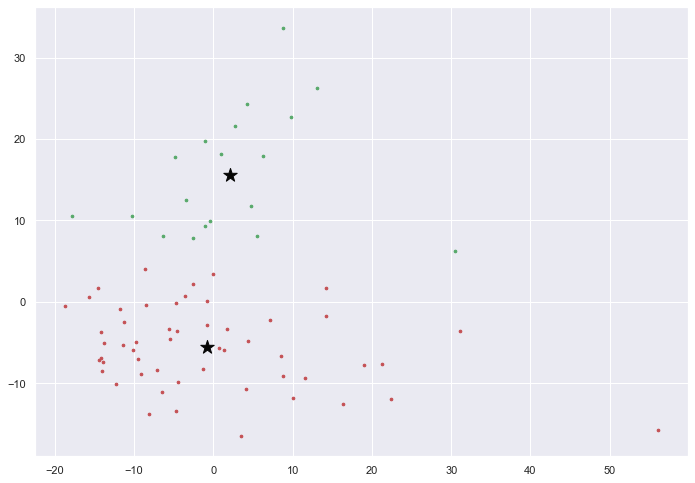

In [ ]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[: ,0], C[:,1], marker='*', s=200, c='#050505')

This part shows real labels of the samples. just run this cell and answer the next question. 

(-20, 25)

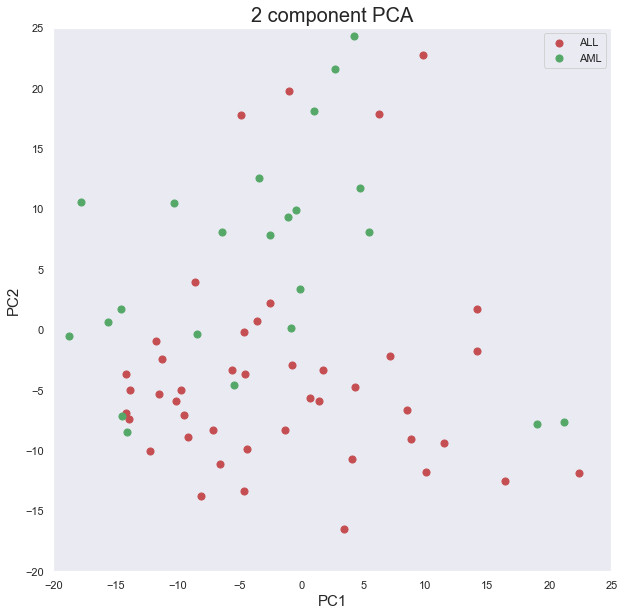

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize=15)
ax.set_ylabel('PC2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)
targets = ['ALL','AML']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['cancer'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'],
               finalDf.loc[indicesToKeep, 'PC2'],
               c=color,
               s=50)
ax.legend(targets)
ax.grid()
ax.set_xlim([-20, 25])
ax.set_ylim([-20, 25])

Compare your results with the figure above and tell us what will change if we change the random seed (try it with two or three different seeds) and what is the solution?

if we change the random seed the initiall centroids will change(initial cluster centers are chosen randomly), and since initiallization matters(because k-means only finds the "LOCAL OPTIMUM" and updating continues untill  each point is appointed to its nearest clusters) in the final clustering we'll have different clusters with different seeds.
the solution is to use meyhods like k-means++ or trying k-means with different random seed and choose the one with the best accuracy_score...


## GMM (30 points)

The EM algorithm for GMM can be simplified in the following steps:

Assuming K is the number of clusters, and N is the number of data points


$z_j^i$ is 1 if $x^i$ is generated from mixture j

Initialize $\mu_k$, $\Sigma_k$ and $\pi_k$ k=1,...K


$\theta=[\pi,\mu,\Sigma]$
## E step:
$\gamma_j^i=P(z_j^i=1|x^i, \theta^{old})=\frac{\pi_j^{old}\mathcal{N}(x^i|\mu_j^{old},\Sigma_j^{old})}{\sum_{k=1}^K\pi_k^{old}\mathcal{N}(x^i|\mu_k^{old},\Sigma_k^{old})}$

## M step:
$\mu_j^{new}=\frac{\sum_{i=1}^N \gamma_j^i x^i}{\sum_{i=1}^N \gamma_j^i}$


$\Sigma_j^{new} = \frac{1}{\sum_{i=1}^N \gamma_j^i} \sum_{i=1}^N \gamma_j^i (x^i-\mu_j^{new}) (x^i-\mu_j^{new})^T$


$\pi_j^{new} = \frac{\sum_{i=1}^N \gamma_j^i}{N}$

Repeat E and M steps until convergence.


In [ ]:
from scipy.stats import multivariate_normal
class GMM(object):
    def __init__(self, x, k, iterations):
        self.x = x
        self.n = x.shape[0] # data points
        self.f = x.shape[1] # features
        self.k = k  # number of clusters
        self.iterations = iterations

        self.predictions = None
        
        # TODO: initialte parameters 
        self.pi =  np.full(shape=self.k, fill_value=1/self.k) # of size (k)
        random_row = np.random.randint(low=0, high=72, size=k)#generate k random number for rows of X
        self.mu = np.array([self.x[random_row[i]] for i in range(k)]) # of size (k, f)
        h=np.diag(np.ones(len(self.x.T)))
        self.sigma = np.array([ np.cov(self.x.T) for i in range(k) ])# of size (k, f, f) 

        self.reg_cov = 2 * np.identity(self.f)
        #self.sigma = np.array([np.eye(self.f) + self.reg_cov] * self.k).reshape(self.k,self.f,self.f)

    def calc_gamma(self):
        # TODO: calculate gamma matrix based on parameters and x
        # returns a matrix of shape (n, k) where n is the number of data points
        gamma_=np.zeros((self.n,self.k))
        for i in range(self.n):#i=row
            for j in range(self.k):
                distribu=multivariate_normal(mean=self.mu[j],cov=self.sigma[j])
                gamma_[i,j]=distribu.pdf(self.x[i])*self.pi[j]
        sum_of_rows=np.sum(gamma_,axis=1).reshape(self.n,1)
        gamma_=gamma_/sum_of_rows
        #print("*")
        
        return gamma_
        #pass
        
    def update_mu(self, gamma):
        # TODO: update self.mu based on x and gamma matrix
        for i in range(self.k):
            w = gamma[:, [i]]#gamma[:, [0]]=cluster one weights ,gamma[:, [1]]=cluster two weights : gamma_columns
            total_weight = w.sum()
            self.mu[i] = (self.x * w).sum(axis=0) / total_weight
        #pass
    
    def update_sigma(self, gamma):
        # TODO: update self.sigma based on x, mu and gamma matrix
        for i in range(self.k):
            w = gamma[:, [i]]
            total_w = w.sum()
            self.sigma[i] = np.cov(self.x.T, 
                aweights=(w/total_w).flatten(), 
                bias=True)
        
        #pass
        
    def update_pi(self, gamma):
        # TODO: update self.pi based on gamma matrix
        self.pi=np.mean(gamma,axis=0)
        #pass
        
    def fit(self):
        for i in range(self.iterations):
            gamma = self.calc_gamma()
            #print("**")
            self.update_mu(gamma)
            self.update_sigma(gamma)
            self.update_pi(gamma)
        
        # TODO: predict the mixture for each data
        return np.argmax(gamma, axis=1)
        

In [ ]:
np.random.seed(7)
gmm = GMM(X,2,22)
gmm_clusters =gmm.fit()
print("accuacy is : ",accuracy_score(true,gmm_clusters))
gmm_clusters

accuacy is :  0.6944444444444444


array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0], dtype=int64)

accuacy is :  0.5416666666666666
accuacy is :  0.7083333333333334
accuacy is :  0.6111111111111112
accuacy is :  0.7083333333333334
accuacy is :  0.7083333333333334
accuacy is :  0.6527777777777778
accuacy is :  0.6527777777777778
accuacy is :  0.6527777777777778
accuacy is :  0.6527777777777778
accuacy is :  0.6527777777777778


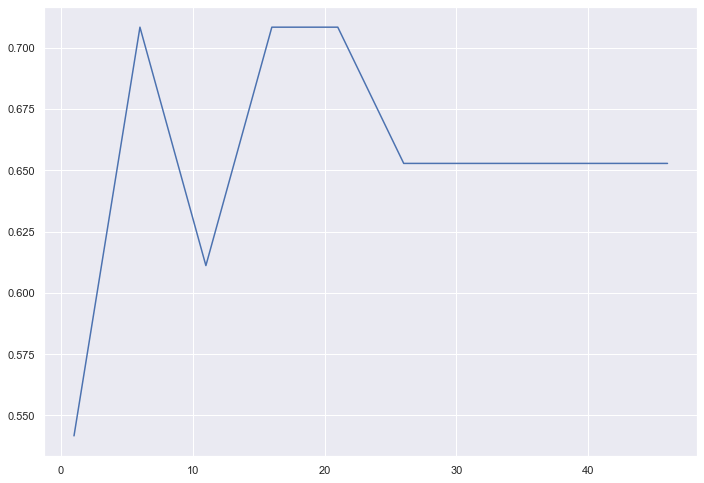

In [ ]:

l1,l2=[],[]
for i in range(1,51,5):
    gmm = GMM(X,2,i)
    gmm_clusters =gmm.fit()
    print("accuacy is : ",accuracy_score(true,gmm_clusters))
    l1.append(i)
    l2.append(accuracy_score(true,gmm_clusters))

plt.plot(l1,l2)
plt.show()

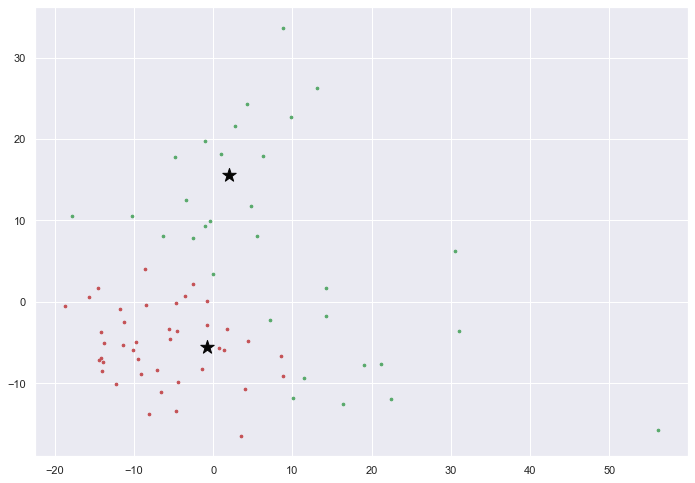

In [ ]:
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if gmm_clusters[j] == i])
        ax.scatter(points[:, 0], points[
            :, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

## t-SNE (10 points)

In this part we are using a generated dataset to test the effect of t-SNE hyperparameters.
The data points are on two paralllel lines with a small additive noise.

In [ ]:
# load the dataset

X1 = np.load('X.npy')
y1 = np.load('y.npy')
print(X1.shape)
print(y1.shape)

(200, 20)
(200,)


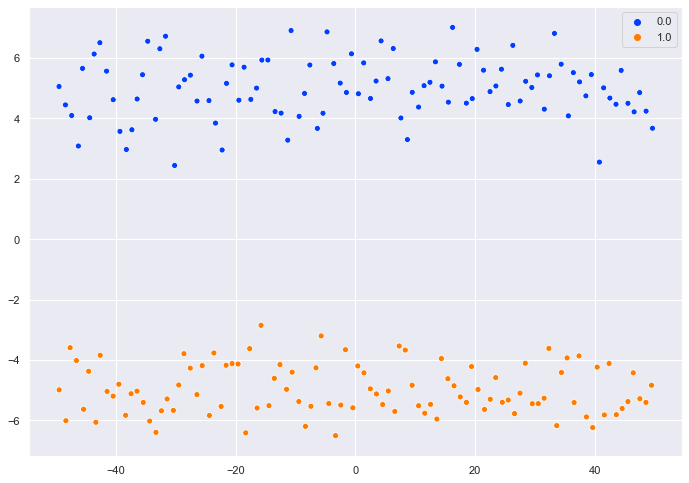

In [ ]:
# plot data in 2 dimensions using PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X1)
sns.scatterplot(x_pca[:,0], x_pca[:,1], hue=y1, legend='full', palette=palette)

Find the best hyperparameters such that the output of t-SNE is similar to the output of PCA. Please make sure that your results are stable. Try running t-SNE a few times until you get the same results.

You can use [this link](https://distill.pub/2016/misread-tsne/) for help!

# without using random_state

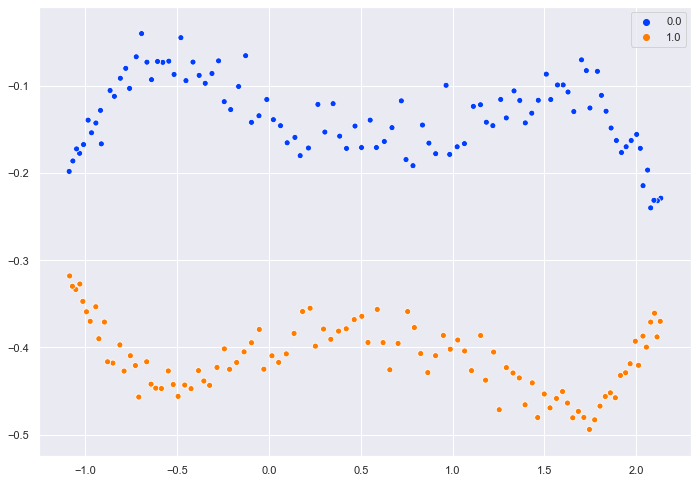

In [ ]:
tsne = TSNE(learning_rate=23,perplexity=160,n_iter=1000,random_state=None)  # TODO: set hyperparameters

X_embedded = tsne.fit_transform(X1)#per=38.1,39.6

sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y1, legend='full', palette=palette)

# using random_state

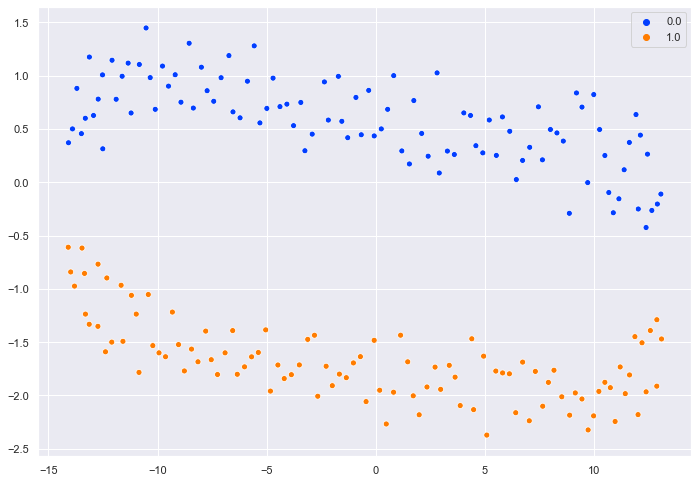

In [ ]:
tsne = TSNE(learning_rate=50,perplexity=39.6,n_iter=1000,random_state=0)  # TODO: set hyperparameters

X_embedded = tsne.fit_transform(X1)#per=38.1,39.6

sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y1, legend='full', palette=palette)

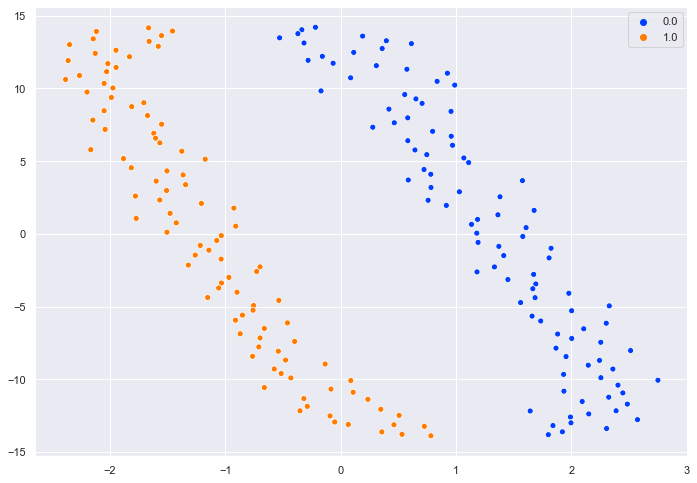

In [ ]:
tsne = TSNE(learning_rate=50,perplexity=38.1,n_iter=1000,random_state=0)  # TODO: set hyperparameters

X_embedded = tsne.fit_transform(X1)#per=38.1,39.6

sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y1, legend='full', palette=palette)

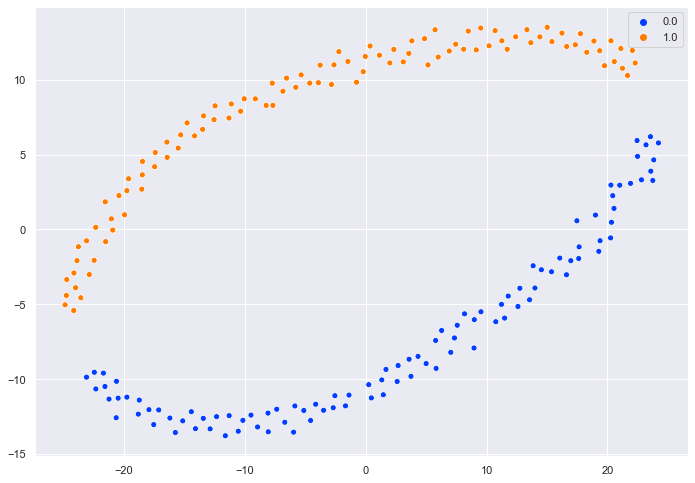

In [ ]:
tsne = TSNE(learning_rate=50,perplexity=16,n_iter=1000,random_state=0)  # TODO: set hyperparameters

X_embedded = tsne.fit_transform(X1)#per=38.1,39.6

sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y1, legend='full', palette=palette)

Are the lines perfectly straight? Can you explain why? 

خیر .در نقاط نزیک به انتهای نقاط حالت خمیده و منحنی گرفته زیرا این نواحی چگال تر هستند وقسمتهای خالی کمتری دارندو تی اس ان ای سعی میکند چنین نقاطی را بیشترگسترش بدهد و در نتیجه حتی در بهترین حالت نیز مقداری انحراف مشاهده میشود